In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn import metrics

from statsmodels.api import add_constant
import statsmodels.discrete.discrete_model as sm

import warnings
warnings.filterwarnings('ignore')

In [289]:
heart_df = pd.read_csv('Heart.csv', index_col=0)

In [290]:
heart_df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


Variables Information: 
------------------------ 
    1. age 
    2. sex 
    3. chest pain type (4 values) 
    4. RestBP: resting blood pressure 
    5. Chol: serum cholestoral in mg/dl 
    6. Fbs: fasting blood sugar > 120 mg/dl 
    7. RestECG: resting electrocardiographic results (values 0,1,2) 
    8. MaxHR: maximum heart rate achieved 
    9. ExAng: exercise induced angina 
    10. oldpeak = ST depression induced by exercise relative to rest 
    11. Slope: the slope of the peak exercise ST segment 
    12. Ca: number of major vessels (0-3) colored by flourosopy 
    13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
    14. AHD: Presence and Absence of Heart Disease

Variables types 
----------------- 

    Real: 1,4,5,8,10,12 
    Ordered:11, 
    Binary: 2,6,9,14
    Nominal:7,3,13 

The target variable in the given data set is AHD ,i.e., prediction of presence and absence of heart disease based on the given information. 
    
The problem is then Classification problem, I will use Logistic Regression to create the model

## EDA and Treatment of Missing Values

In [298]:
heart_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
Sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
RestBP,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
Chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
Fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
RestECG,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
MaxHR,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
ExAng,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
Oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2
Slope,297.0,1.602694,0.618187,1.0,1.0,2.0,2.0,3.0


In [294]:
heart_df.shape

(303, 14)

In [295]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
Age          303 non-null int64
Sex          303 non-null int64
ChestPain    303 non-null object
RestBP       303 non-null int64
Chol         303 non-null int64
Fbs          303 non-null int64
RestECG      303 non-null int64
MaxHR        303 non-null int64
ExAng        303 non-null int64
Oldpeak      303 non-null float64
Slope        303 non-null int64
Ca           299 non-null float64
Thal         301 non-null object
AHD          303 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [296]:
heart_df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [297]:
heart_df.dropna(inplace=True)

In [220]:
heart_df.shape

(297, 14)

In [299]:
heart_df['Ca']=heart_df['Ca'].astype('category')
heart_df['RestECG']=heart_df['RestECG'].astype('category')
heart_df.AHD.replace({'Yes':1,'No':0},inplace=True)

In [509]:
heart_df.corr()

,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,Slope,AHD
Age,1.000000,-0.092399,0.290476,0.202644,0.132062,-0.394563,0.096489,0.197123,0.159405,0.227075
Sex,-0.092399,1.000000,-0.066340,-0.198089,0.038850,-0.060496,0.143581,0.106567,0.033345,0.278467
RestBP,0.290476,-0.066340,1.000000,0.131536,0.180860,-0.049108,0.066691,0.191243,0.121172,0.153490
Chol,0.202644,-0.198089,0.131536,1.000000,0.012708,-0.000075,0.059339,0.038596,-0.009215,0.080285
Fbs,0.132062,0.038850,0.180860,0.012708,1.000000,-0.007842,-0.000893,0.008311,0.047819,0.003167
MaxHR,-0.394563,-0.060496,-0.049108,-0.000075,-0.007842,1.000000,-0.384368,-0.347640,-0.389307,-0.423817
ExAng,0.096489,0.143581,0.066691,0.059339,-0.000893,-0.384368,1.000000,0.289310,0.250572,0.421355
Oldpeak,0.197123,0.106567,0.191243,0.038596,0.008311,-0.347640,0.289310,1.000000,0.579037,0.424052
Slope,0.159405,0.033345,0.121172,-0.009215,0.047819,-0.389307,0.250572,0.579037,1.000000,0.333049
AHD,0.227075,0.278467,0.153490,0.080285,0.003167,-0.423817,0.421355,0.424052,0.333049,1.000000


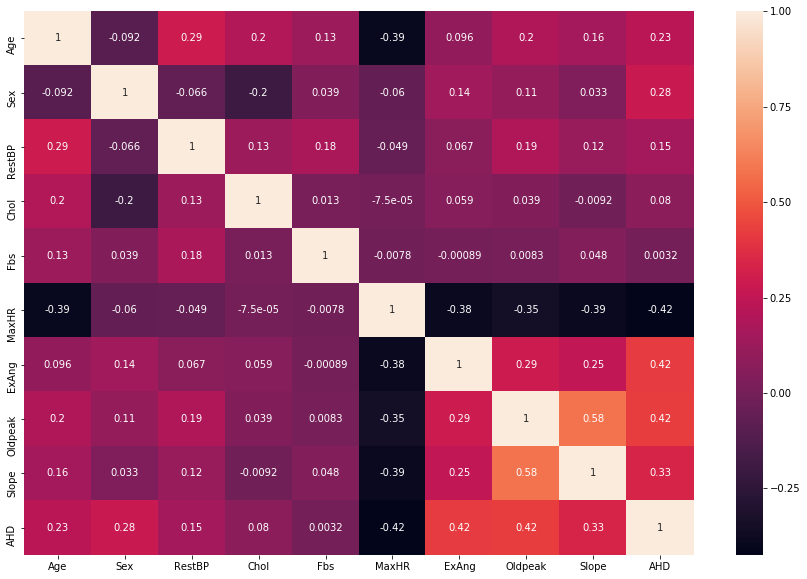

In [511]:
fig, ax = plt.subplots(figsize=(15,10))
fig=sns.heatmap(heart_df.corr(), annot= True)
plt.show()

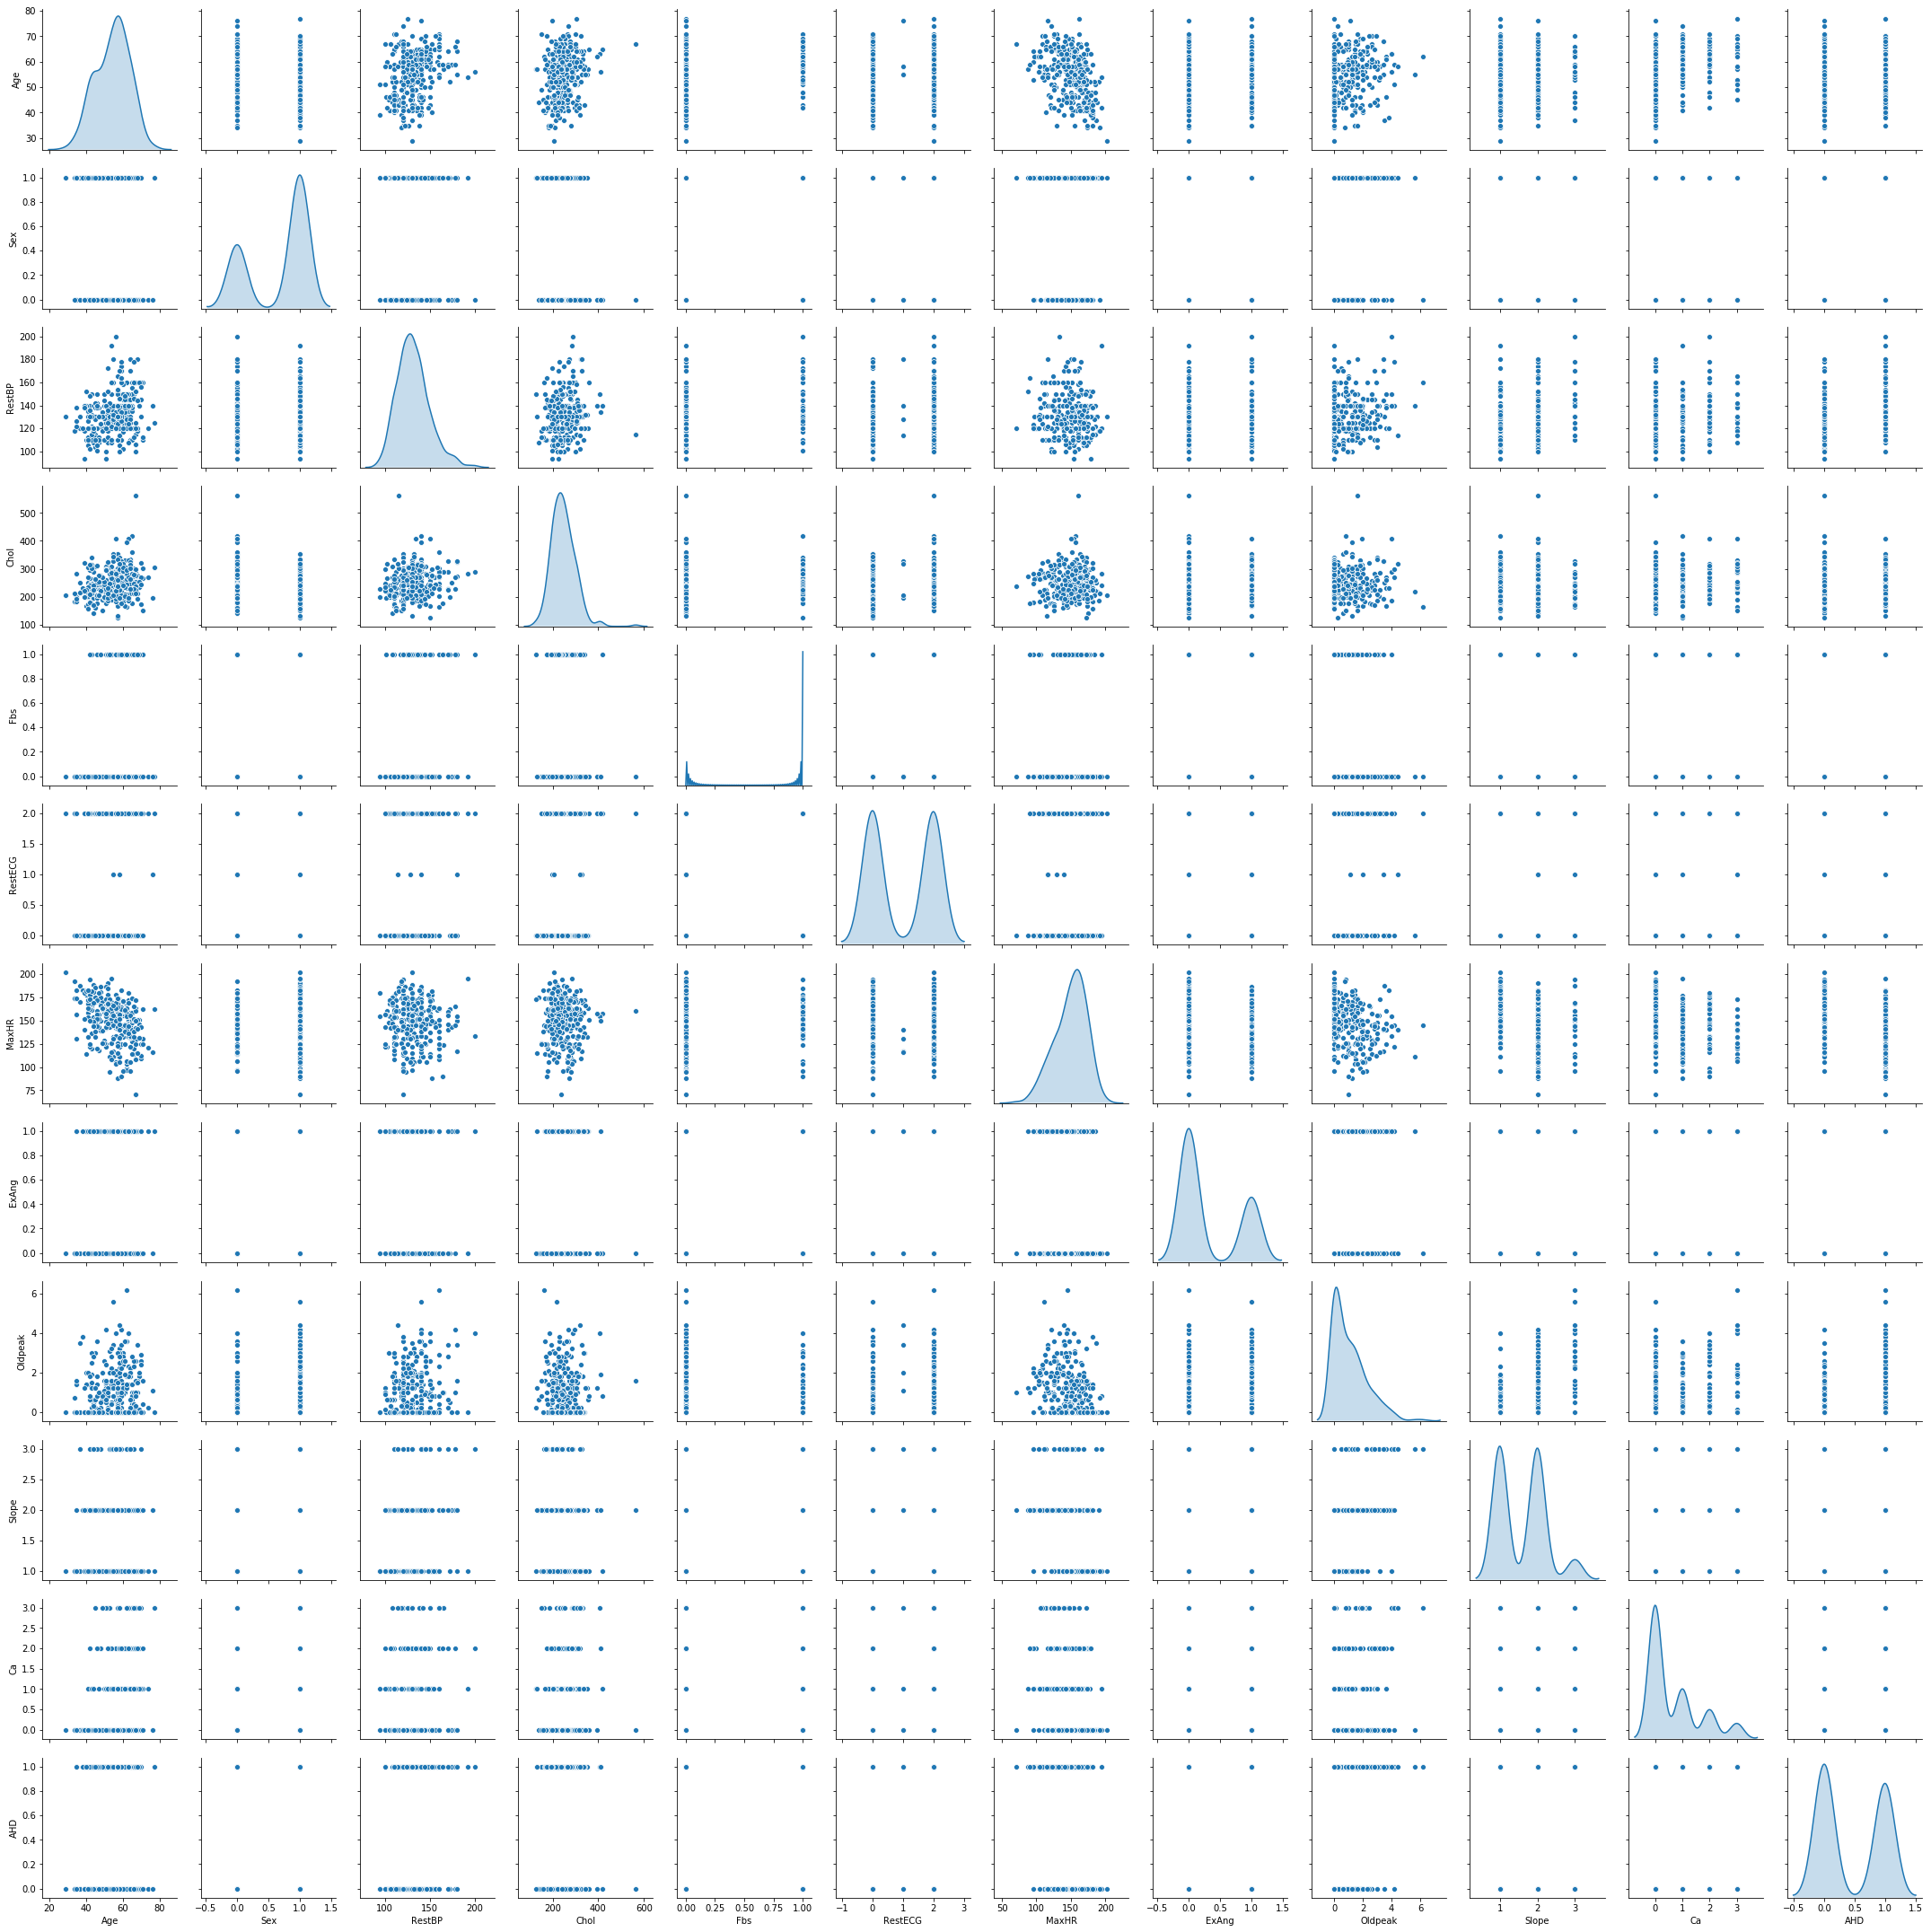

In [237]:
sns.pairplot(heart_df, diag_kind='kde')
plt.show()

## Logistic Regression

In [486]:
#By looking at heatmap and pairplot we can see that Fbs has the least relationship coefficient with AHD, so we drop it
#Also by checking the pvalues from Logit Regression result at the bottom, dropping the column one by one

x= heart_df.drop(['AHD','Fbs','ExAng','RestECG','Age'], axis=1) 
y= heart_df.AHD

(297, 9)

In [487]:
x = pd.get_dummies(x,drop_first=True) #for categorical variables with more than 2 classes
x.head()

,Sex,RestBP,Chol,MaxHR,Oldpeak,Slope,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Ca_1.0,Ca_2.0,Ca_3.0,Thal_normal,Thal_reversable
1,1,145,233,150,2.3,3,0,0,1,0,0,0,0,0
2,1,160,286,108,1.5,2,0,0,0,0,0,1,1,0
3,1,120,229,129,2.6,2,0,0,0,0,1,0,0,1
4,1,130,250,187,3.5,3,1,0,0,0,0,0,1,0
5,0,130,204,172,1.4,1,0,1,0,0,0,0,1,0


In [488]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=2) #spliting the data into 70% training, 30% testing

In [489]:
x_train.shape

(207, 14)

In [491]:
x_test.shape

(90, 14)

In [492]:
logreg= LogisticRegression() #Calling the Logistic Regression function

In [494]:
logreg.fit(x_train,y_train) #training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [495]:
ypred=logreg.predict(x_test) #predict the ypred for xtest

In [496]:
metrics.accuracy_score(y_test,ypred)

0.8444444444444444

In [499]:
print(metrics.classification_report(y_test,ypred))

             precision    recall  f1-score   support

          0       0.84      0.87      0.85        47
          1       0.85      0.81      0.83        43

avg / total       0.84      0.84      0.84        90



In [500]:
x2= add_constant(x_train)
logit= sm.Logit(y_train,x2)
result= logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.303148
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    AHD   No. Observations:                  207
Model:                          Logit   Df Residuals:                      192
Method:                           MLE   Df Model:                           14
Date:                Fri, 11 Jan 2019   Pseudo R-squ.:                  0.5600
Time:                        14:24:23   Log-Likelihood:                -62.752
converged:                       True   LL-Null:                       -142.61
                                        LLR p-value:                 8.105e-27
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.0819      2.943     -2.066      0.039     -11.851      -0.313

## Best Precision and Recall values for the model

In [508]:
cross=pd.crosstab(y_test,ypred)

TN= cross[0][0]
FP= cross[1][0]
FN= cross[0][1]
TP= cross[1][1]

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Accuracy = (TP+TN)/(TP+FP+FN+TN)
print('Confusion Matrix: \n\n',cross,'\n')
print('The Precision of the model is\t %1.4f \nThe Recall of the model is\t %1.4f \nwith the accuracy score of\t %1.4f' %(Precision,Recall,Accuracy))

Confusion Matrix: 

 col_0   0   1
AHD          
0      41   6
1       8  35 

The Precision of the model is	 0.8537 
The Recall of the model is	 0.8140 
with the accuracy score of	 0.8444


The End